In [1]:
#Misc
import os
import pickle
import importlib

#Data
import pandas as pd
import numpy as np


# Visualización
import cufflinks as cf
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import seaborn as sns

# Opciones
plt.style.use('seaborn-white')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
cf.set_config_file(theme='white',dimensions=(650,450))
cf.go_offline()

In [2]:
# Scripts personales
sys.path.insert(1, '../../Datasets/')

# String
import StringUtils 
importlib.reload(StringUtils)

import PlotUtils 
importlib.reload(PlotUtils)

import SupervisedUtils 
importlib.reload(SupervisedUtils)

<module 'SupervisedUtils' from '../../Datasets\\SupervisedUtils.py'>

## Funciones de utilidad

In [3]:
def save_object(obj,name):
  with open(name + '.pkl', 'wb') as file:
    pickle.dump(obj, file, pickle.HIGHEST_PROTOCOL)

def load_object(name):
    with open(name, 'rb') as file:
        return(pickle.load(file))

## Base módulo 1

In [4]:
TMDb = pd.read_feather('../M1/DBM1')
TMDb.head(2)

,id,genres,original_language,overview,popularity,year,month,day,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,610150,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,2022.0,6.0,11.0,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg
1,616037,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,2022.0,7.0,6.0,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg


## Generación de variables

In [5]:
movies = TMDb.copy()
movies = movies.loc[movies['overview'].isna()==False].reset_index(drop=True)
movies = movies.loc[movies['budget']>0].reset_index(drop=True)
movies = movies.loc[movies['vote_average']>0].reset_index(drop=True)
movies = movies.loc[movies['genres'].isna()==False].reset_index(drop=True)
movies = movies.drop(columns= ['poster_path','backdrop_path','day','revenue','status'])
print(movies.shape)


(22880, 13)


In [6]:
movies.isna().sum().to_frame().T

,id,genres,original_language,overview,popularity,year,month,budget,runtime,tagline,vote_average,vote_count,keywords
0,0,0,0,0,0,204,204,0,48,8550,0,0,5480


In [7]:
movies = movies.dropna(subset=['year','month','runtime']).reset_index(drop=True)

### Variable objetivo

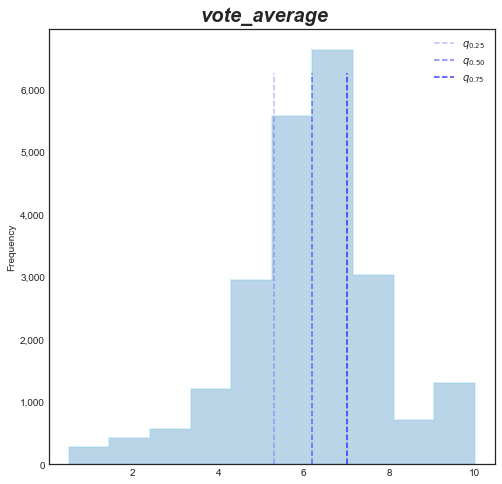

In [8]:
PlotUtils.hist(movies,'vote_average')

In [9]:
# movies['y']=pd.cut(movies['vote_average'],2)
movies['y']=pd.cut(movies['vote_average'],[0,6.5,10],labels=['Malo','Buena'],include_lowest=True)

In [10]:
movies['y'].value_counts()

Malo     13633
Buena     9004
Name: y, dtype: int64

In [11]:
le = SupervisedUtils.LabelEncoder()
le.fit(movies['y'])
y = le.transform(movies['y'])

In [12]:
# cvdb = movies.copy()

In [13]:
# movies = movies.groupby('Rating').apply(lambda x: x.sample(min(x.shape[0],15000),random_state=12345)).reset_index(drop=True)
# movies = movies.groupby('y').apply(lambda x: x.sample(frac=0.15,random_state=12345)).reset_index(drop=True)

In [14]:
# movies['Rating'].value_counts()

In [15]:
# cvdb = cvdb.loc[~cvdb['id'].isin(movies['id'])].reset_index(drop=True)

### Variables independientes

In [16]:
movies.columns

Index(['id', 'genres', 'original_language', 'overview', 'popularity', 'year',
       'month', 'budget', 'runtime', 'tagline', 'vote_average', 'vote_count',
       'keywords', 'y'],
      dtype='object')

In [17]:
features = ['genres','original_language','overview','year','month','budget','runtime','tagline','keywords']
X = movies[features]
X.head(2)

,genres,original_language,overview,year,month,budget,runtime,tagline,keywords
0,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,2022.0,7.0,250000000.0,119.0,The one is not the only.,ex-girlfriend-hero-greek mythology-sequel-supe...
1,Thriller-Action,en,When danger threatens her camp the fierce and ...,2022.0,8.0,65000000.0,100.0,They hunt to live. It lives to hunt.,hunter-alien life-form-prequel-alien-native am...


In [18]:
X.isna().sum().to_frame().T

,genres,original_language,overview,year,month,budget,runtime,tagline,keywords
0,0,0,0,0,0,0,0,8441,5347


### Particion de los datos

In [60]:
X_train, X_test, y_train, y_test = SupervisedUtils.train_test_split(X, y, test_size=0.3, random_state=12345)

In [61]:
X_train

,genres,original_language,overview,year,month,budget,runtime,tagline,keywords
19080,Comedy-Horror,kn,Raghava is a fun-loving youngster who enjoys p...,2012.0,9.0,550000.0,165.0,None,None
11196,Horror-Science Fiction-Thriller,en,Dr. Samantha Goodman is a beautiful young psyc...,2005.0,3.0,500000.0,80.0,None,canada-winter-hostage-olympic games-cabin-psyc...
15488,Documentary,en,One Nation Under Trump is the first comprehens...,2016.0,8.0,25000.0,62.0,None,politics
1477,Action-Adventure-Family-Fantasy-Science Fictio...,en,The legendary Power Rangers must stop the evil...,1997.0,3.0,10000000.0,99.0,The Power Is Back!,california-narration-volcano-child hero-sequel...
12316,Horror,en,John Brock is a down-on-his-luck archaeologist...,2019.0,10.0,1500000.0,98.0,Welcome to Hell,None
...,...,...,...,...,...,...,...,...,...
11689,Drama-Action-Comedy,en,After serving jail time for a mysterious crime...,2009.0,9.0,31192.0,89.0,You're only as good as the people you know.,murder-dark comedy-crime family
19876,Horror-Science Fiction,en,An international research group is searching n...,2017.0,4.0,179000.0,29.0,Some places are best left alone.,oceanic expedition-cthulhu-short film-lovecraf...
2177,Comedy-Romance,en,Five years after meeting her three fathers Sop...,2018.0,7.0,75000000.0,113.0,Discover how it all began.,greece-musical-sequel-greek island-aftercredit...
11749,Drama-Western,en,"""The Work and The Glory: American Zion"" sets t...",2005.0,10.0,6500000.0,100.0,Every Dream Has a Price,based on novel or book-husband wife relationsh...


## Procesamiento de variables independientes

### Variables categoricas

In [62]:
counts = X_train['genres'].str.split('-').explode().value_counts(True)
mask = counts>0.05
genres_mask = counts[mask].index
genresaux = X_train['genres'].str.split('-').explode().reset_index()
genresaux.loc[~genresaux['genres'].isin(genres_mask),'genres'] = 'OTROS'
genresaux = genresaux.reset_index().pivot_table(index='index',columns='genres',values='level_0',aggfunc='count',fill_value=0)
genresaux.columns = ['genre_' + col for col in genresaux.columns]
# X_train = pd.concat([X_train,genresaux],axis=1).drop(columns = ['genres'])
X_train = X_train.merge(genresaux,left_index=True,right_index=True).drop(columns = ['genres'])
X_train.head(2)

,original_language,overview,year,month,budget,runtime,tagline,keywords,genre_Action,genre_Comedy,genre_Drama,genre_Horror,genre_OTROS,genre_Romance,genre_Thriller
19080,kn,Raghava is a fun-loving youngster who enjoys p...,2012.0,9.0,550000.0,165.0,None,None,0,1,0,1,0,0,0
11196,en,Dr. Samantha Goodman is a beautiful young psyc...,2005.0,3.0,500000.0,80.0,None,canada-winter-hostage-olympic games-cabin-psyc...,0,0,0,1,1,0,1


In [63]:
genresaux = X_test['genres'].str.split('-').explode().reset_index()
genresaux.loc[~genresaux['genres'].isin(genres_mask),'genres'] = 'OTROS'
genresaux = genresaux.reset_index().pivot_table(index='index',columns='genres',values='level_0',aggfunc='count',fill_value=0)
genresaux.columns = ['genre_' + col for col in genresaux.columns]

# X_test = pd.concat([X_test,genresaux],axis=1).drop(columns = ['genres'])
X_test = X_test.merge(genresaux,left_index=True,right_index=True).drop(columns = ['genres'])
X_test.head(2)

,original_language,overview,year,month,budget,runtime,tagline,keywords,genre_Action,genre_Comedy,genre_Drama,genre_Horror,genre_OTROS,genre_Romance,genre_Thriller
11460,en,In the countryside the boy Alan and his friend...,2008.0,7.0,1500000.0,0.0,None,snake-voodoo-giant snake-giant animal,0,0,0,1,2,0,0
18446,en,A pansexual polyamorous trio kidnap a 'pray-th...,2019.0,5.0,27000.0,19.0,None,None,0,1,0,1,0,0,1


In [64]:
counts = X_train['original_language'].value_counts(True)
mask = counts>0.10
language_mask = counts[mask].index
X_train.loc[~X_train['original_language'].isin(language_mask),'original_language'] = 'OTROS'
X_train = pd.get_dummies(X_train,columns = ['original_language'])
X_train.head(2)

,overview,year,month,budget,runtime,tagline,keywords,genre_Action,genre_Comedy,genre_Drama,genre_Horror,genre_OTROS,genre_Romance,genre_Thriller,original_language_OTROS,original_language_en
19080,Raghava is a fun-loving youngster who enjoys p...,2012.0,9.0,550000.0,165.0,None,None,0,1,0,1,0,0,0,1,0
11196,Dr. Samantha Goodman is a beautiful young psyc...,2005.0,3.0,500000.0,80.0,None,canada-winter-hostage-olympic games-cabin-psyc...,0,0,0,1,1,0,1,0,1


In [65]:
X_test.loc[~X_test['original_language'].isin(language_mask),'original_language'] = 'OTROS'
X_test = pd.get_dummies(X_test,columns = ['original_language'])
X_test.head(2)

,overview,year,month,budget,runtime,tagline,keywords,genre_Action,genre_Comedy,genre_Drama,genre_Horror,genre_OTROS,genre_Romance,genre_Thriller,original_language_OTROS,original_language_en
11460,In the countryside the boy Alan and his friend...,2008.0,7.0,1500000.0,0.0,None,snake-voodoo-giant snake-giant animal,0,0,0,1,2,0,0,0,1
18446,A pansexual polyamorous trio kidnap a 'pray-th...,2019.0,5.0,27000.0,19.0,None,None,0,1,0,1,0,0,1,0,1


### Variables de tipo caracter

In [66]:
engstopwords = StringUtils.stopwords.words('english')
customsw  = ['one','film','movie','man','two','story']
engstopwords = engstopwords + customsw


In [67]:
X_train['overview_clean']=StringUtils.clean_re(X_train['overview'])
X_train['overview_clean']=StringUtils.remove_stopwords(X_train['overview_clean'],engstopwords)
X_train['overview_clean']=StringUtils.remove_accents(X_train['overview_clean'])

X_test['overview_clean']=StringUtils.clean_re(X_test['overview'])
X_test['overview_clean']=StringUtils.remove_stopwords(X_test['overview_clean'],engstopwords)
X_test['overview_clean']=StringUtils.remove_accents(X_test['overview_clean'])

In [68]:
overview_vc = StringUtils.TfidfVectorizer(max_features=100)
overview_vc.fit(X_train['overview_clean'])

X_overview_train = overview_vc.transform(X_train['overview_clean']).toarray()
X_overview_train = pd.DataFrame(X_overview_train).set_index(X_train.index)
X_overview_train.columns  = ['overview_' + str(j) for j in range(X_overview_train.shape[1])]
X_overview_test  = overview_vc.transform(X_test['overview_clean']).toarray()
X_overview_test = pd.DataFrame(X_overview_test).set_index(X_test.index)
X_overview_test.columns  = ['overview_' + str(j) for j in range(X_overview_test.shape[1])]

In [69]:
keywords_vc = StringUtils.CountVectorizer(tokenizer= lambda x: x.split('-'),max_features=100)
keywords_vc.fit(X_train['keywords'].astype(str))

X_keywords_train = keywords_vc.transform(X_train['keywords'].astype(str)).toarray()
X_keywords_train = pd.DataFrame(X_keywords_train).set_index(X_train.index)
X_keywords_train.columns  = ['keywords_' + str(j) for j in range(X_keywords_train.shape[1])]
X_keywords_test  = keywords_vc.transform(X_test['keywords'].astype(str)).toarray()
X_keywords_test = pd.DataFrame(X_keywords_test).set_index(X_test.index)
X_keywords_test.columns  = ['keywords_' + str(j) for j in range(X_keywords_test.shape[1])]

c:\Python\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [70]:
X_string_train = pd.concat([X_overview_train,X_keywords_train],axis=1)
X_string_test = pd.concat([X_overview_test,X_keywords_test],axis=1)

In [71]:
stringvars = ['overview','keywords','tagline','overview_clean']

In [72]:
X_train = pd.concat([X_train.drop(columns=stringvars),X_string_train],axis=1)
X_test = pd.concat([X_test.drop(columns=stringvars),X_string_test],axis=1)

In [73]:
X_train.head(2)

,year,month,budget,runtime,genre_Action,genre_Comedy,genre_Drama,genre_Horror,genre_OTROS,genre_Romance,genre_Thriller,original_language_OTROS,original_language_en,overview_0,overview_1,overview_2,overview_3,overview_4,overview_5,overview_6,overview_7,overview_8,overview_9,overview_10,overview_11,overview_12,overview_13,overview_14,overview_15,overview_16,overview_17,overview_18,overview_19,overview_20,overview_21,overview_22,overview_23,overview_24,overview_25,overview_26,overview_27,overview_28,overview_29,overview_30,overview_31,overview_32,overview_33,overview_34,overview_35,overview_36,overview_37,overview_38,overview_39,overview_40,overview_41,overview_42,overview_43,overview_44,overview_45,overview_46,overview_47,overview_48,overview_49,overview_50,overview_51,overview_52,overview_53,overview_54,overview_55,overview_56,overview_57,overview_58,overview_59,overview_60,overview_61,overview_62,overview_63,overview_64,overview_65,overview_66,overview_67,overview_68,overview_69,overview_70,overview_71,overview_72,overview_73,overview_74,overview_75,overview_76,overview_77,overview_78,overview_79,overview_80,overview_81,overview_82,overview_83,overview_84,overview_85,overview_86,overview_87,overview_88,overview_89,overview_90,overview_91,overview_92,overview_93,overview_94,overview_95,overview_96,overview_97,overview_98,overview_99,keywords_0,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5,keywords_6,keywords_7,keywords_8,keywords_9,keywords_10,keywords_11,keywords_12,keywords_13,keywords_14,keywords_15,keywords_16,keywords_17,keywords_18,keywords_19,keywords_20,keywords_21,keywords_22,keywords_23,keywords_24,keywords_25,keywords_26,keywords_27,keywords_28,keywords_29,keywords_30,keywords_31,keywords_32,keywords_33,keywords_34,keywords_35,keywords_36,keywords_37,keywords_38,keywords_39,keywords_40,keywords_41,keywords_42,keywords_43,keywords_44,keywords_45,keywords_46,keywords_47,keywords_48,keywords_49,keywords_50,keywords_51,keywords_52,keywords_53,keywords_54,keywords_55,keywords_56,keywords_57,keywords_58,keywords_59,keywords_60,keywords_61,keywords_62,keywords_63,keywords_64,keywords_65,keywords_66,keywords_67,keywords_68,keywords_69,keywords_70,keywords_71,keywords_72,keywords_73,keywords_74,keywords_75,keywords_76,keywords_77,keywords_78,keywords_79,keywords_80,keywords_81,keywords_82,keywords_83,keywords_84,keywords_85,keywords_86,keywords_87,keywords_88,keywords_89,keywords_90,keywords_91,keywords_92,keywords_93,keywords_94,keywords_95,keywords_96,keywords_97,keywords_98,keywords_99
19080,2012.0,9.0,550000.0,165.0,0,1,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.206135,0.0,0.0,0.219586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.164739,0.0,0.0,0.0,0.0,0.0,0.355682,0.0,0.0,0.0,0.21052,0.0,0.189452,0.0,0.550907,0.20605,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.215457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.394267,0.0,0.0,0.0,0.0,0.0,0.196711,0.0,0.0,0.0,0.0,0.0,0.0,0.222513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.198496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11196,2005.0,3.0,500000.0,80.0,0,0,0,1,1,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473857,0.0,0.0,0.358021,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.482778,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.421615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.373692,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [74]:
X_test.head(2)

,year,month,budget,runtime,genre_Action,genre_Comedy,genre_Drama,genre_Horror,genre_OTROS,genre_Romance,genre_Thriller,original_language_OTROS,original_language_en,overview_0,overview_1,overview_2,overview_3,overview_4,overview_5,overview_6,overview_7,overview_8,overview_9,overview_10,overview_11,overview_12,overview_13,overview_14,overview_15,overview_16,overview_17,overview_18,overview_19,overview_20,overview_21,overview_22,overview_23,overview_24,overview_25,overview_26,overview_27,overview_28,overview_29,overview_30,overview_31,overview_32,overview_33,overview_34,overview_35,overview_36,overview_37,overview_38,overview_39,overview_40,overview_41,overview_42,overview_43,overview_44,overview_45,overview_46,overview_47,overview_48,overview_49,overview_50,overview_51,overview_52,overview_53,overview_54,overview_55,overview_56,overview_57,overview_58,overview_59,overview_60,overview_61,overview_62,overview_63,overview_64,overview_65,overview_66,overview_67,overview_68,overview_69,overview_70,overview_71,overview_72,overview_73,overview_74,overview_75,overview_76,overview_77,overview_78,overview_79,overview_80,overview_81,overview_82,overview_83,overview_84,overview_85,overview_86,overview_87,overview_88,overview_89,overview_90,overview_91,overview_92,overview_93,overview_94,overview_95,overview_96,overview_97,overview_98,overview_99,keywords_0,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5,keywords_6,keywords_7,keywords_8,keywords_9,keywords_10,keywords_11,keywords_12,keywords_13,keywords_14,keywords_15,keywords_16,keywords_17,keywords_18,keywords_19,keywords_20,keywords_21,keywords_22,keywords_23,keywords_24,keywords_25,keywords_26,keywords_27,keywords_28,keywords_29,keywords_30,keywords_31,keywords_32,keywords_33,keywords_34,keywords_35,keywords_36,keywords_37,keywords_38,keywords_39,keywords_40,keywords_41,keywords_42,keywords_43,keywords_44,keywords_45,keywords_46,keywords_47,keywords_48,keywords_49,keywords_50,keywords_51,keywords_52,keywords_53,keywords_54,keywords_55,keywords_56,keywords_57,keywords_58,keywords_59,keywords_60,keywords_61,keywords_62,keywords_63,keywords_64,keywords_65,keywords_66,keywords_67,keywords_68,keywords_69,keywords_70,keywords_71,keywords_72,keywords_73,keywords_74,keywords_75,keywords_76,keywords_77,keywords_78,keywords_79,keywords_80,keywords_81,keywords_82,keywords_83,keywords_84,keywords_85,keywords_86,keywords_87,keywords_88,keywords_89,keywords_90,keywords_91,keywords_92,keywords_93,keywords_94,keywords_95,keywords_96,keywords_97,keywords_98,keywords_99
11460,2008.0,7.0,1500000.0,0.0,0,0,0,1,2,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617602,0.0,0.0,0.0,0.0,0.0,0.0,0.293119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272503,0.0,0.0,0.267763,0.0,0.0,0.0,0.290782,0.262136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288117,0.0,0.0,0.0,0.0,0.0,0.256865,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18446,2019.0,5.0,27000.0,19.0,0,1,0,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Escalamiento

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler()

In [77]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Modelado

### Regresión logística

#### Modelo default

In [146]:
LogModel = SupervisedUtils.LogisticRegression(random_state=12345, n_jobs=-1)
LogModel


LogisticRegression(n_jobs=-1, random_state=12345)

In [147]:

LogModel.fit(X_train,y_train)
y_LogModel=LogModel.predict(X_test)
LogModel_train_score = LogModel.score(X_train,y_train)
print(f'Score en train: {LogModel_train_score}')
LogModel_test_score = LogModel.score(X_test,y_test)
print(f'Score en test: {LogModel_test_score}')

Score en train: 0.6736509940044177
Score en test: 0.6566548881036514


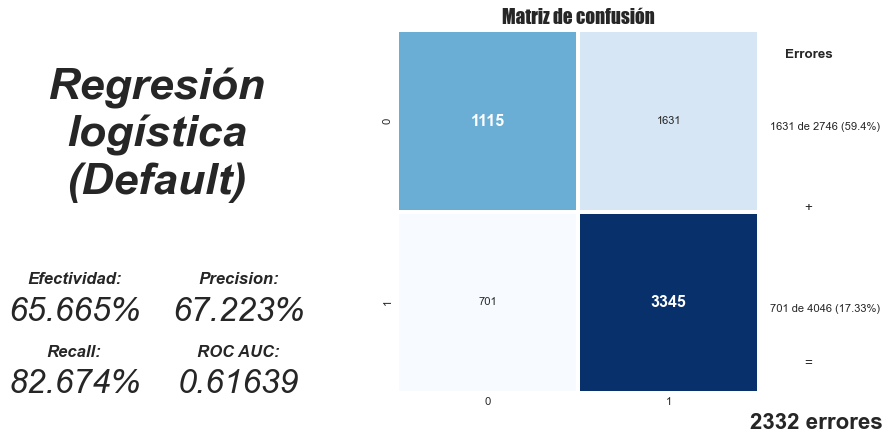

In [81]:
acc_LogModel, prec_LogModel, rec_LogModel, roc_LogModel = SupervisedUtils.model_cf('Regresión\nlogística\n(Default)',y_test,y_LogModel)

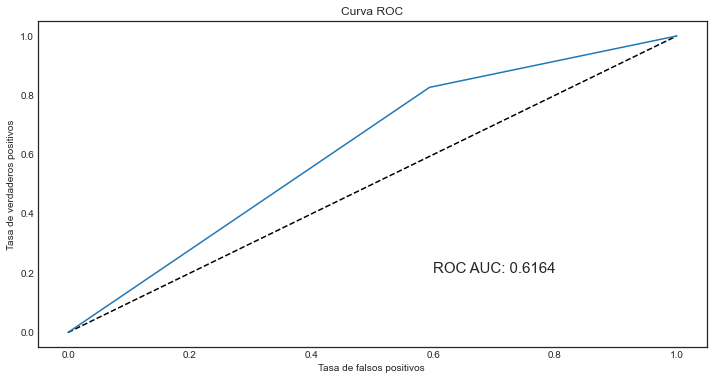

In [82]:
SupervisedUtils.grafica_curva_roc(y_test,y_LogModel)

#### Tunning de parámetro C

In [83]:
clist = np.logspace(-2,4,20,base=2)

LogitTemp=SupervisedUtils.LogisticRegression(random_state=12345, n_jobs=-1)

train_scores, test_scores = SupervisedUtils.validation_curve(
    LogitTemp,
    X_train,
    y_train,
    param_name='C',
    param_range=clist,
    cv=3,
    n_jobs=-1,
    scoring="accuracy")
    

In [85]:
cscores=list(map(np.mean,test_scores))
ctunning = pd.DataFrame(cscores,index=clist,columns=['Score en test'])
# ctunning

In [86]:
cbest=clist[np.argmax(cscores)]

Text(0.5, 1.0, 'Efectividad media de una regresión logística con parámetro C')

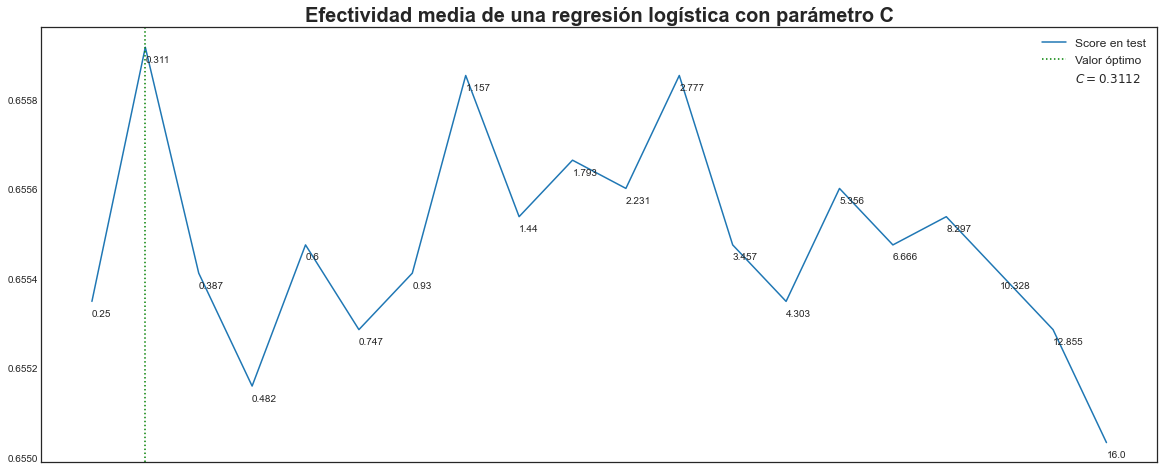

In [87]:
ctunning.plot(logx=True,figsize=(20,8))
plt.axvline(x=cbest,label='Valor óptimo',linestyle=':',color='green')
plt.plot([], [],' ',label=f'$C={round(cbest,4)}$')

plt.legend(fontsize = 'large')

for ind,i in enumerate(clist):
    plt.text(i,cscores[ind]-0.15*np.std(cscores),round(i,3))
    
plt.xticks([])
plt.title('Efectividad media de una regresión logística con parámetro C',size=20,fontweight='bold')

#### Mejor regresión logística

In [88]:
BestLogModel = SupervisedUtils.LogisticRegression(C=cbest,random_state=12345, n_jobs=-1)

In [145]:
BestLogModel = SupervisedUtils.LogisticRegression(C=cbest,random_state=12345, n_jobs=-1)
BestLogModel

LogisticRegression(C=0.3111731473660059, n_jobs=-1, random_state=12345)

In [148]:

BestLogModel.fit(X_train,y_train)
y_BestLogModel=BestLogModel.predict(X_test)
BestLogModel_train_score = BestLogModel.score(X_train,y_train)
print(f'Score en train: {BestLogModel_train_score}')
BestLogModel_test_score = BestLogModel.score(X_test,y_test)
print(f'Score en test: {BestLogModel_test_score}')

Score en train: 0.6732092142631745
Score en test: 0.6600412249705536


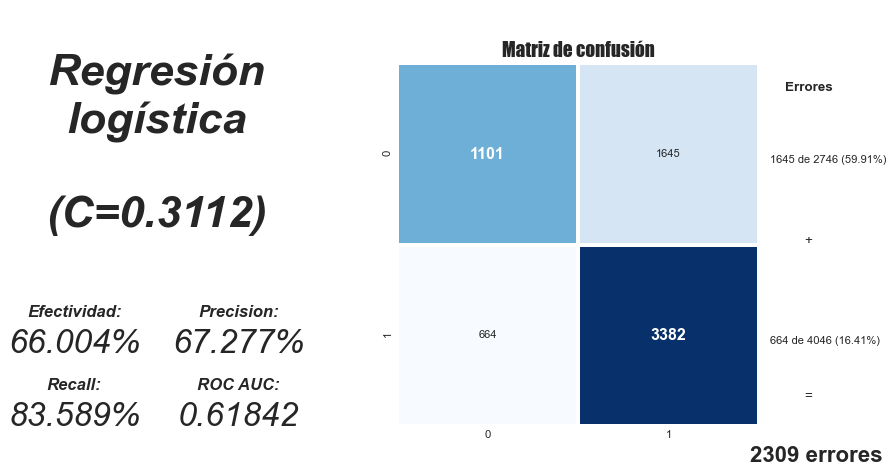

In [149]:
acc_BestLogModel, prec_BestLogModel, rec_BestLogModel, roc_BestLogModel = SupervisedUtils.model_cf('\nRegresión\nlogística\n\n(C=0.3112)',y_test,y_BestLogModel)

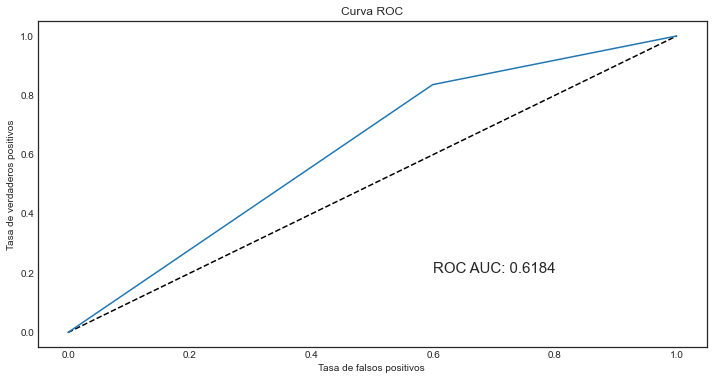

In [150]:
SupervisedUtils.grafica_curva_roc(y_test,y_BestLogModel)

### Random Forest

#### Modelo default

In [141]:
RFModel = SupervisedUtils.RandomForestClassifier(random_state=12345, n_jobs=-1)
RFModel

RandomForestClassifier(n_jobs=-1, random_state=12345)

In [142]:

RFModel.fit(X_train,y_train)
y_RFModel=RFModel.predict(X_test)
RFModel_train_score = RFModel.score(X_train,y_train)
print(f'Score en train: {RFModel_train_score}')
RFModel_test_score = RFModel.score(X_test,y_test)
print(f'Score en test: {RFModel_test_score}')

Score en train: 1.0
Score en test: 0.7530918727915195


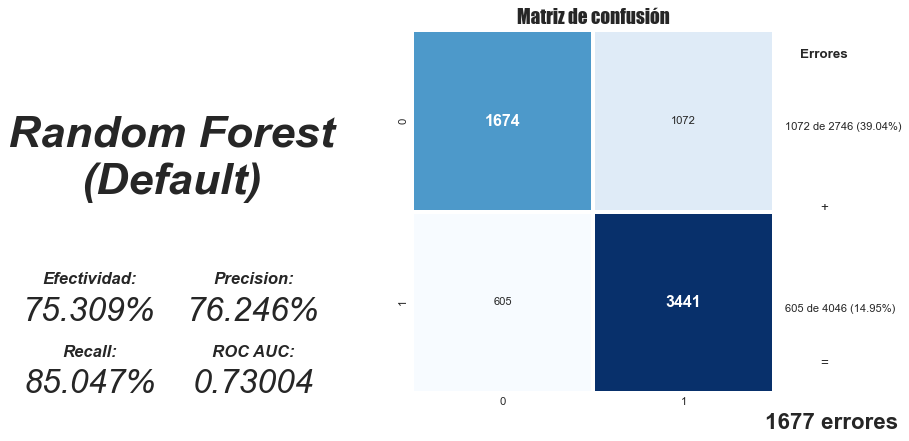

In [102]:
acc_RFModel, prec_RFmodel, rec_RFModel, roc_RFModel = SupervisedUtils.model_cf('Random Forest\n(Default)',y_test,y_RFModel)

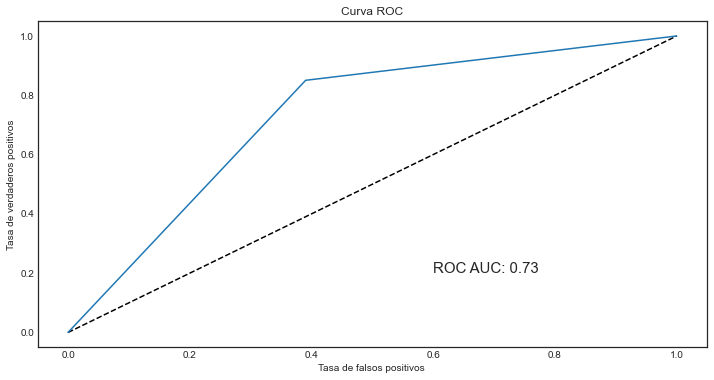

In [103]:
SupervisedUtils.grafica_curva_roc(y_test,y_RFModel)

#### Tunning de parámetros

In [108]:
param_grid={'n_estimators' : [10,50,100,200],
            'criterion' : ['gini','entropy'],
            'max_depth' : [None, 2,5,10,20,50],
            'min_samples_split' : [2,4,6,10],
            'min_samples_leaf' : [1,2,3],
           }

In [111]:
RF = SupervisedUtils.RandomForestClassifier(random_state=12345, n_jobs=-1)

In [112]:
search_RF = SupervisedUtils.HalvingGridSearchCV(RF, cv=3, param_grid=param_grid,factor = 4,random_state=12345,verbose=np.inf,scoring="accuracy").fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 61
max_resources_: 15845
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 576
n_resources: 61
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV 1/3; 1/576] START criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1/576] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 2/3; 1/576] START criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 1/576] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=(train=1.000, test=0.550) total time=   0.0s
[CV 3/3; 1/576] START criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 1/576] END criterion=gini, max_depth=None, min_samples_leaf=1, min_sam

In [113]:
rftunning=pd.DataFrame(search_RF.cv_results_)

In [114]:
indrfmax=np.argmax(rftunning['mean_test_score'])
rfbest=rftunning.iloc[indrfmax,:]

Text(0.5, 0.98, 'Efectividad media usando diversos parámetros en un modelo Random Forest\n(3K Fold CV)')

<Figure size 640x480 with 0 Axes>

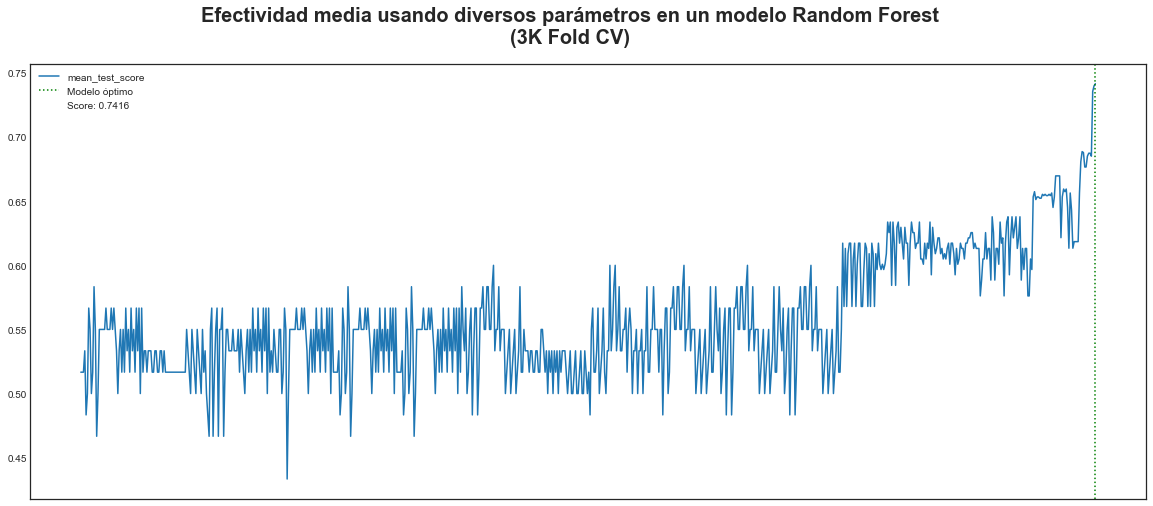

In [121]:
plt.figure(figsize=(8, 6), dpi=80)
    

rftunning.plot(use_index=True, y='mean_test_score',figsize=(20,8))

# for ind,i in enumerate(rftunning.index):
#     plt.text(ind,rftunning['mean_test_score'][ind],str(ind),ha='center')

plt.gca().set_xticks([])
plt.axvline(x=indrfmax,label='Modelo óptimo',linestyle=':',color='green')
plt.plot([],[],' ',label=f"Score: {round(rftunning['mean_test_score'][indrfmax],4)}")
plt.legend()

plt.suptitle('Efectividad media usando diversos parámetros en un modelo Random Forest\n(3K Fold CV)',size=20,fontweight='bold')

In [123]:
rfbest

iter                                                                       4
n_resources                                                            15616
mean_fit_time                                                        3.12757
std_fit_time                                                        0.131902
mean_score_time                                                     0.120382
std_score_time                                                   0.000440486
param_criterion                                                      entropy
param_max_depth                                                         None
param_min_samples_leaf                                                     1
param_min_samples_split                                                    4
param_n_estimators                                                       200
params                     {'criterion': 'entropy', 'max_depth': None, 'm...
split0_test_score                                                   0.740634

In [126]:
rftunning[[x for x in rftunning if 'param_' in x] + ['mean_train_score','mean_test_score']].tail(20)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
748,entropy,50,1,4,200,1.000000,0.656410
749,entropy,None,1,2,200,1.000000,0.643077
750,entropy,20,2,2,10,0.887179,0.613333
751,entropy,50,2,2,10,0.918462,0.618462
752,entropy,None,2,4,10,0.918462,0.618462
753,entropy,None,2,2,10,0.918462,0.618462
754,entropy,50,2,4,10,0.918462,0.618462
755,gini,20,1,6,100,0.967692,0.656410
756,gini,20,1,4,100,0.940174,0.680758
757,entropy,None,1,4,200,0.999488,0.688701


#### Mejor modelo Random Forest

> Nuestro mejor modelo Random Forest tiene los siguientes parámetros

In [137]:
BestRFModel = SupervisedUtils.RandomForestClassifier(**rfbest['params'],random_state=12345, n_jobs=-1)
BestRFModel

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=200, n_jobs=-1, random_state=12345)

In [138]:
BestRFModel.fit(X_train,y_train)
y_BestRFModel=BestRFModel.predict(X_test)
BestRFModel_train_score = BestRFModel.score(X_train,y_train)
print(f'Score en train: {BestRFModel_train_score}')
BestRFModel_test_score = BestRFModel.score(X_test,y_test)
print(f'Score en test: {BestRFModel_test_score}')

Score en train: 0.9991164405175134
Score en test: 0.7541224970553593


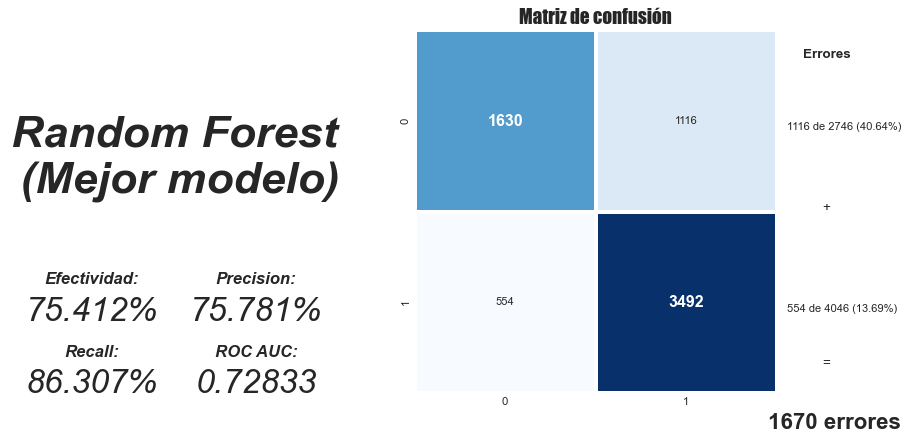

In [139]:
acc_BestRFModel, prec_BestRFModel, rec_BestRFModel, roc_BestRFModel = SupervisedUtils.model_cf('\nRandom Forest\n (Mejor modelo)',y_test,y_BestRFModel)

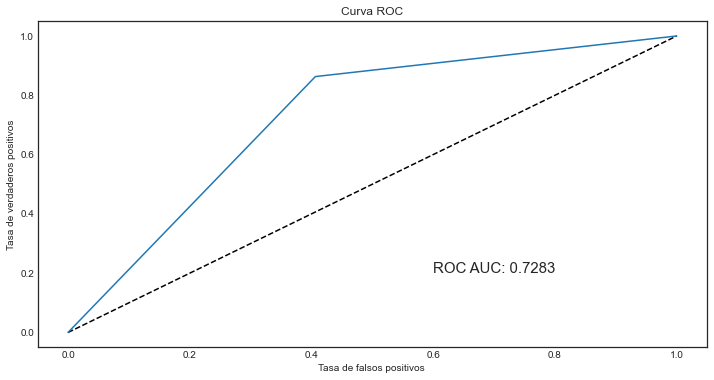

In [140]:
SupervisedUtils.grafica_curva_roc(y_test,y_BestRFModel)

### KNN

#### Modelo default

In [151]:
KNNModel = SupervisedUtils.KNeighborsClassifier(n_jobs=-1)
KNNModel

KNeighborsClassifier(n_jobs=-1)

In [152]:
KNNModel.fit(X_train,y_train)
y_KNNModel=KNNModel.predict(X_test)
KNNModel_train_score = KNNModel.score(X_train,y_train)
print(f'Score en train: {KNNModel_train_score}')
KNNModel_test_score = KNNModel.score(X_test,y_test)
print(f'Score en test: {KNNModel_test_score}')

Score en train: 0.7618176080782582
Score en test: 0.616902237926973


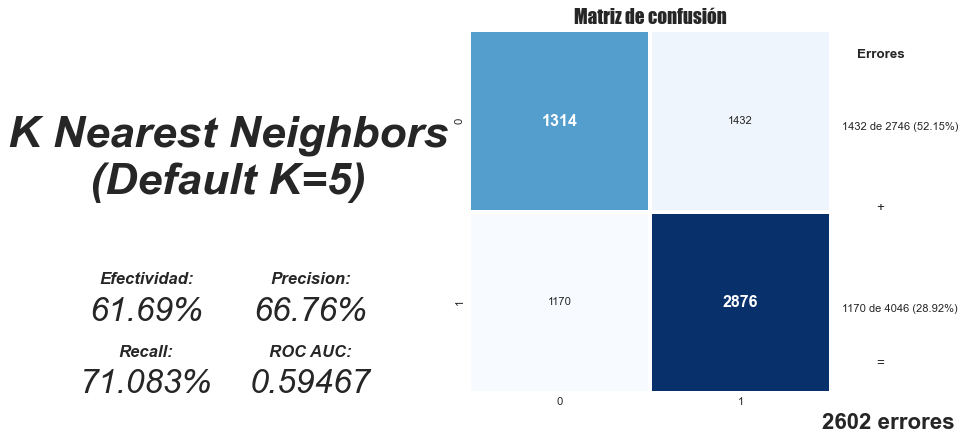

In [155]:
acc_KNNModel, prec_KNNModel, rec_KNNModel, roc_KNNModel = SupervisedUtils.model_cf('K Nearest Neighbors\n(Default K=5)',y_test,y_KNNModel)

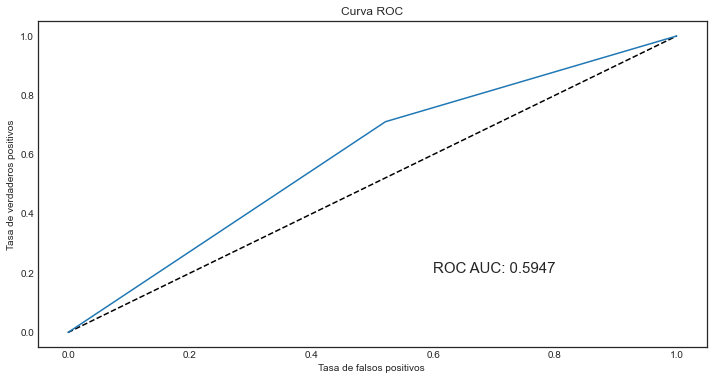

In [156]:
SupervisedUtils.grafica_curva_roc(y_test,y_KNNModel)

#### Tunning de parámetros

In [157]:
param_grid={'n_neighbors':[2,5,7,10,50],
            'weights' : ['uniform', 'distance'],
            'leaf_size':[10,30,50,100],
            'p':[1,2]
           }

In [158]:
KNN = SupervisedUtils.KNeighborsClassifier(n_jobs=-1)

In [159]:
search_KNN = SupervisedUtils.HalvingGridSearchCV(KNN, cv=3, param_grid=param_grid,factor = 2,random_state=12345,verbose=np.inf,scoring="accuracy").fit(X_train, y_train)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 247
max_resources_: 15845
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 80
n_resources: 247
Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3; 1/80] START leaf_size=10, n_neighbors=2, p=1, weights=uniform..........
[CV 1/3; 1/80] END leaf_size=10, n_neighbors=2, p=1, weights=uniform;, score=(train=0.659, test=0.476) total time=   0.0s
[CV 2/3; 1/80] START leaf_size=10, n_neighbors=2, p=1, weights=uniform..........
[CV 2/3; 1/80] END leaf_size=10, n_neighbors=2, p=1, weights=uniform;, score=(train=0.640, test=0.488) total time=   0.0s
[CV 3/3; 1/80] START leaf_size=10, n_neighbors=2, p=1, weights=uniform..........
[CV 3/3; 1/80] END leaf_size=10, n_neighbors=2, p=1, weights=uniform;, score=(train=0.750, test=0.549) total time=   0.0s
[CV 1/3; 2/80] START leaf_size=10, n_neighbors=2, p=1, weights=distance.........
[CV 1/3; 2/80] END leaf_size=10, n_neighbors=2,

In [160]:
knntunning=pd.DataFrame(search_KNN.cv_results_)

In [161]:
indknnmax=np.argmax(knntunning['mean_test_score'])
knnbest=knntunning.iloc[indknnmax,:]

Text(0.5, 0.98, 'Efectividad media usando diversos parámetros en un modelo Random Forest\n(3K Fold CV)')

<Figure size 640x480 with 0 Axes>

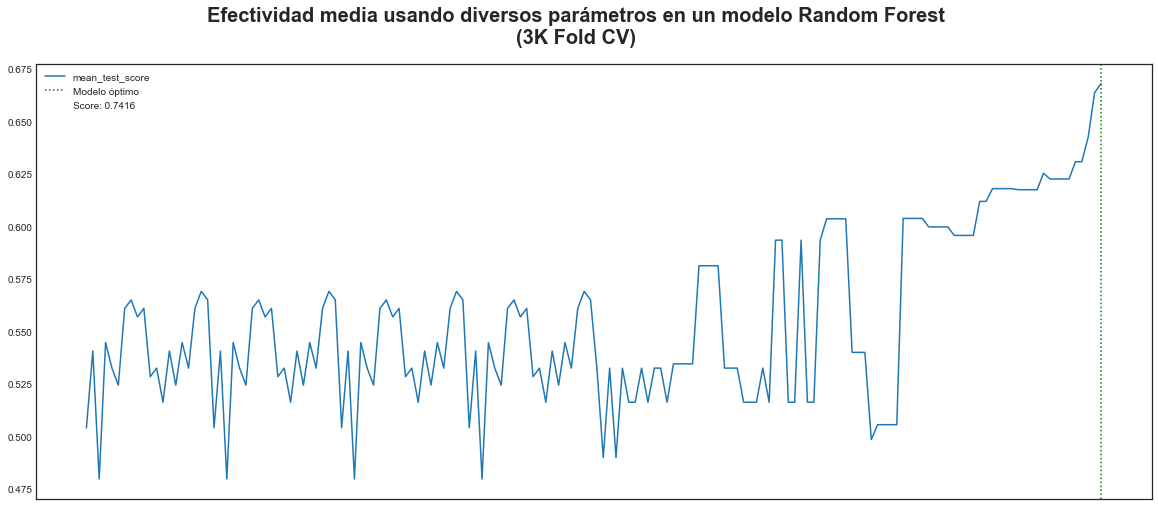

In [164]:
plt.figure(figsize=(8, 6), dpi=80)
    

knntunning.plot(use_index=True, y='mean_test_score',figsize=(20,8))

# for ind,i in enumerate(rftunning.index):
#     plt.text(ind,rftunning['mean_test_score'][ind],str(ind),ha='center')

plt.gca().set_xticks([])
plt.axvline(x=indknnmax,label='Modelo óptimo',linestyle=':',color='green')
plt.plot([],[],' ',label=f"Score: {round(rftunning['mean_test_score'][indrfmax],4)}")
plt.legend()

plt.suptitle('Efectividad media usando diversos parámetros en un modelo Random Forest\n(3K Fold CV)',size=20,fontweight='bold')

In [166]:
knnbest

iter                                                                  6
n_resources                                                       15808
mean_fit_time                                                 0.0480012
std_fit_time                                                 0.00374153
mean_score_time                                                   4.237
std_score_time                                                 0.249086
param_leaf_size                                                      50
param_n_neighbors                                                    50
param_p                                                               1
param_weights                                                  distance
params                {'leaf_size': 50, 'n_neighbors': 50, 'p': 1, '...
split0_test_score                                              0.682862
split1_test_score                                              0.672803
split2_test_score                                              0

In [169]:
knntunning[[x for x in knntunning if 'param_' in x] + ['mean_train_score','mean_test_score']].tail(20)

,param_leaf_size,param_n_neighbors,param_p,param_weights,mean_train_score,mean_test_score
140,10,50,2,uniform,0.639079,0.611955
141,100,50,2,uniform,0.639079,0.611955
142,50,50,2,distance,1.000000,0.618034
143,10,50,2,distance,1.000000,0.618034
144,100,50,2,distance,1.000000,0.618034
145,30,50,2,distance,1.000000,0.618034
146,100,50,1,distance,1.000000,0.617528
147,10,50,1,distance,1.000000,0.617528
148,30,50,1,distance,1.000000,0.617528
149,50,50,1,distance,1.000000,0.617528


#### Mejor modelo KNN

> Los mejores parámetros para un modelo KNN son:

In [170]:
BestKNNModel = SupervisedUtils.KNeighborsClassifier(**knnbest['params'],n_jobs=-1)
BestKNNModel

KNeighborsClassifier(leaf_size=50, n_jobs=-1, n_neighbors=50, p=1,
                     weights='distance')

In [171]:
BestKNNModel.fit(X_train,y_train)
y_BestKNNModel=BestKNNModel.predict(X_test)
BestKNNModel_train_score = BestKNNModel.score(X_train,y_train)
print(f'Score en train: {BestKNNModel_train_score}')
BestKNNModel_test_score = BestKNNModel.score(X_test,y_test)
print(f'Score en test: {BestKNNModel_test_score}')

Score en train: 1.0
Score en test: 0.6782979976442874


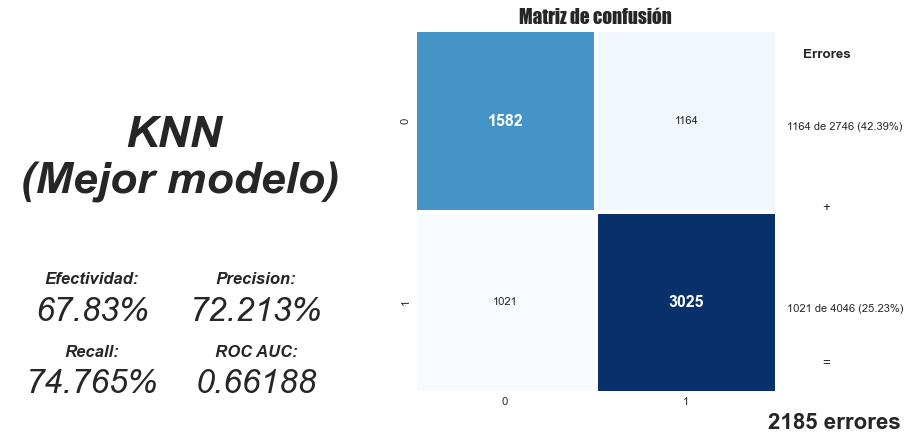

In [172]:
acc_BestKNNModel, prec_BestKNNModel, rec_BestKNNModel, roc_BestKNNModel = SupervisedUtils.model_cf('\nKNN\n (Mejor modelo)',y_test,y_BestKNNModel)

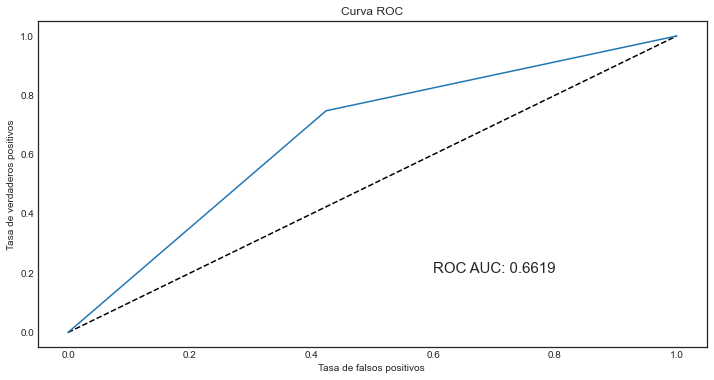

In [173]:
SupervisedUtils.grafica_curva_roc(y_test,y_BestKNNModel)

## Ensambles

#### Ensamble de modelos default

In [184]:
y_preds_def= pd.DataFrame(LogModel.predict(X_train), columns=['Regresión logística'])
y_preds_def['Random Forest']=RFModel.predict(X_train)
y_preds_def['KNN']=KNNModel.predict(X_train)
y_preds_def['Emsable modelos default']=y_preds_def.mode(axis=1)
y_ensdefault=y_preds_def['Emsable modelos default']
y_preds_def.head(10)

,Regresión logística,Random Forest,KNN,Emsable modelos default
0,1,1,1,1
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,0,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


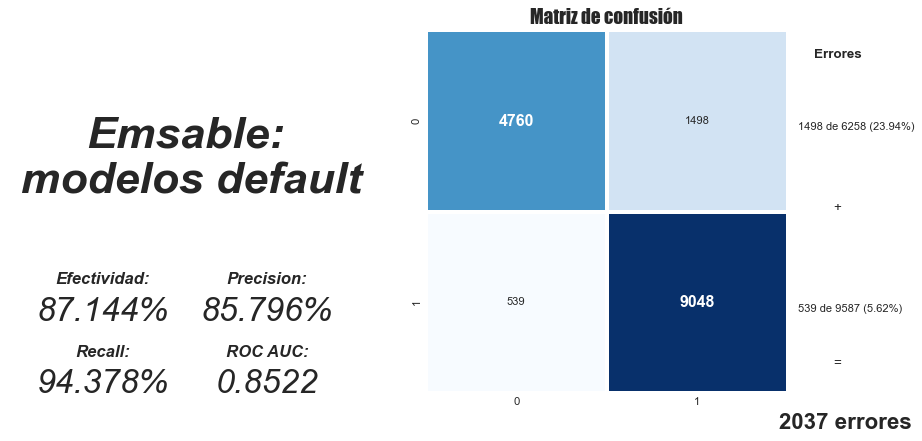

In [185]:
acc_ensdefault, prec_ensdefault, rec_ensdefault, roc_ensdefault = SupervisedUtils.model_cf('Emsable:\n modelos default',y_train,y_ensdefault)

In [186]:
y_preds_def= pd.DataFrame(y_LogModel, columns=['Regresión logística'])
y_preds_def['Random Forest']=y_RFModel
y_preds_def['KNN']=y_KNNModel
y_preds_def['Emsable modelos default']=y_preds_def.mode(axis=1)
y_ensdefault=y_preds_def['Emsable modelos default']
y_preds_def.head(10)

,Regresión logística,Random Forest,KNN,Emsable modelos default
0,1,1,0,1
1,1,1,1,1
2,1,1,1,1
3,1,0,1,1
4,0,0,0,0
5,1,1,0,1
6,1,1,1,1
7,0,1,1,1
8,0,0,0,0
9,1,1,1,1


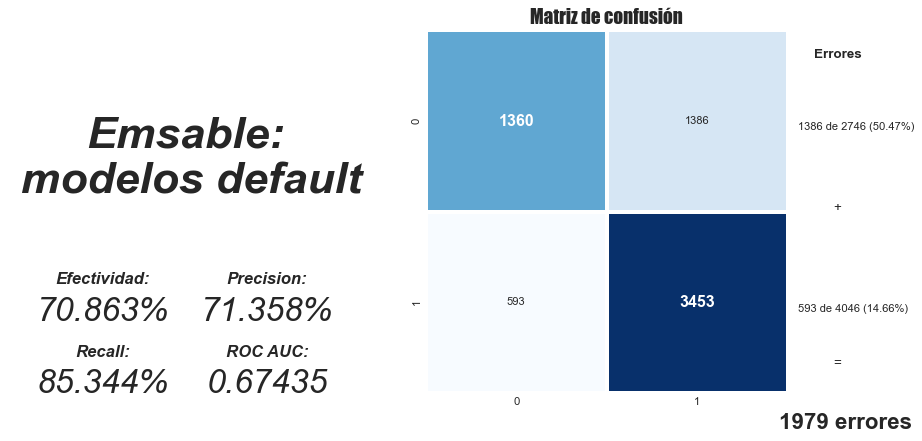

In [187]:
acc_ensdefault, prec_ensdefault, rec_ensdefault, roc_ensdefault = SupervisedUtils.model_cf('Emsable:\n modelos default',y_test,y_ensdefault)

#### Ensamble de modelos seleccionados

In [188]:
y_preds_best= pd.DataFrame(BestLogModel.predict(X_train), columns=['Regresión logística'])
y_preds_best['Random Forest']=BestRFModel.predict(X_train)
y_preds_best['KNN']=BestKNNModel.predict(X_train)
y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
y_ensbest=y_preds_best['Emsable mejores modelos']
y_preds_best.head(10)

,Regresión logística,Random Forest,KNN,Emsable mejores modelos
0,1,1,1,1
1,1,1,1,1
2,0,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,0,0,0
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


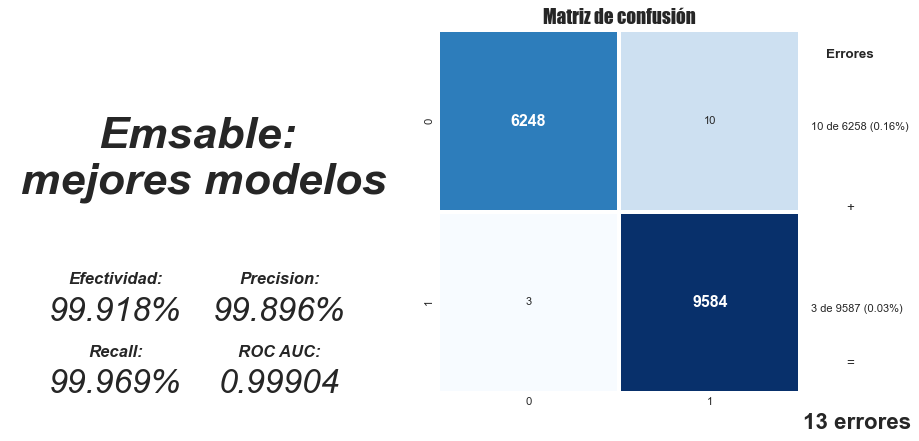

In [189]:
acc_ensbest, prec_ensbest, rec_ensbest, roc_ensbest = SupervisedUtils.model_cf('Emsable:\n mejores modelos',y_train,y_ensbest)

In [198]:
y_preds_best= pd.DataFrame(y_BestLogModel, columns=['Regresión logística'])
y_preds_best['Random Forest']=y_BestRFModel
y_preds_best['KNN']=y_BestKNNModel
y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
y_ensbest=y_preds_best['Emsable mejores modelos']
y_preds_best.head(10)

,Regresión logística,Random Forest,KNN,Emsable mejores modelos
0,1,1,0,1
1,1,1,1,1
2,1,1,1,1
3,1,0,1,1
4,0,0,0,0
5,1,1,1,1
6,1,1,1,1
7,0,1,1,1
8,0,0,0,0
9,1,1,1,1


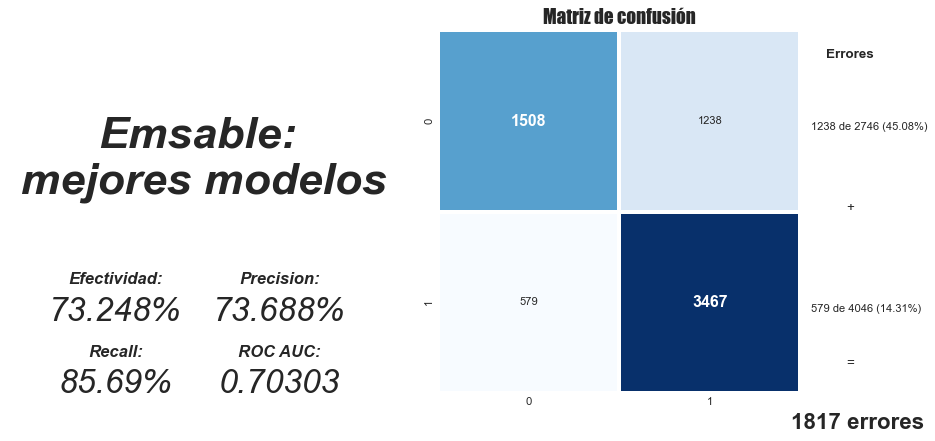

In [199]:
acc_ensbest, prec_ensbest, rec_ensbest, roc_ensbest = SupervisedUtils.model_cf('Emsable:\n mejores modelos',y_test,y_ensbest)

### Comparación de modelos

#### Métricas de modelos default

In [200]:
ModelMetricsDef= pd.DataFrame([acc_LogModel,prec_LogModel,rec_LogModel,roc_LogModel],index=['Efectividad','Precision','Recall','ROC AUC - Score'],columns=['Regresión logística'])
ModelMetricsDef['Random Forest']=[acc_RFModel,prec_RFmodel,rec_RFModel,roc_RFModel]
ModelMetricsDef['KNN']=[acc_KNNModel,prec_KNNModel,rec_KNNModel,roc_KNNModel]
ModelMetricsDef['Ensamble: Default']=[acc_ensdefault,prec_ensdefault,rec_ensdefault,roc_ensdefault]

In [201]:
ModelMetricsDef

,Regresión logística,Random Forest,KNN,Ensamble: Default
Efectividad,0.656650,0.753090,0.61690,0.708630
Precision,0.672230,0.762460,0.66760,0.713580
Recall,0.826740,0.850470,0.71083,0.853440
ROC AUC - Score,0.616394,0.730042,0.59467,0.674351


In [ ]:
# ModelMetricsDef_TFID=ModelMetricsDef
# save_object(ModelMetricsDef_TFID,'ModelMetricsDef_TFID')

In [ ]:
# ModelMetricsDef = load_object('ModelMetricsDef_TFID.pkl')
# ModelMetricsDef_TFID=ModelMetricsDef

#### Métricas de modelos seleccionados

In [202]:
ModelMetrics= pd.DataFrame([acc_BestLogModel,prec_BestLogModel,rec_BestLogModel,roc_BestLogModel],index=['Efectividad','Precision','Recall','ROC AUC - Score'],columns=['Regresión logística'])
ModelMetrics['Random Forest']=[acc_BestRFModel,prec_BestRFModel,rec_BestRFModel,roc_RFModel]
ModelMetrics['KNN']=[acc_BestKNNModel,prec_BestKNNModel,rec_BestKNNModel,roc_BestKNNModel]
ModelMetrics['Ensamble: Mejores modelos']=[acc_ensbest,prec_ensbest,rec_ensbest,roc_ensbest]

In [203]:
ModelMetrics

,Regresión logística,Random Forest,KNN,Ensamble: Mejores modelos
Efectividad,0.660040,0.754120,0.678300,0.732480
Precision,0.672770,0.757810,0.722130,0.736880
Recall,0.835890,0.863070,0.747650,0.856900
ROC AUC - Score,0.618417,0.730042,0.661881,0.703029


In [ ]:
# ModelMetrics_TFID=ModelMetrics
# save_object(ModelMetrics_TFID,'ModelMetrics_TFID')

In [ ]:
# ModelMetrics = load_object('ModelMetrics_TFID.pkl')
# ModelMetrics_TFID=ModelMetrics

### Resumen

Text(0.5, 0.98, 'Métricas de modelos entrenados')

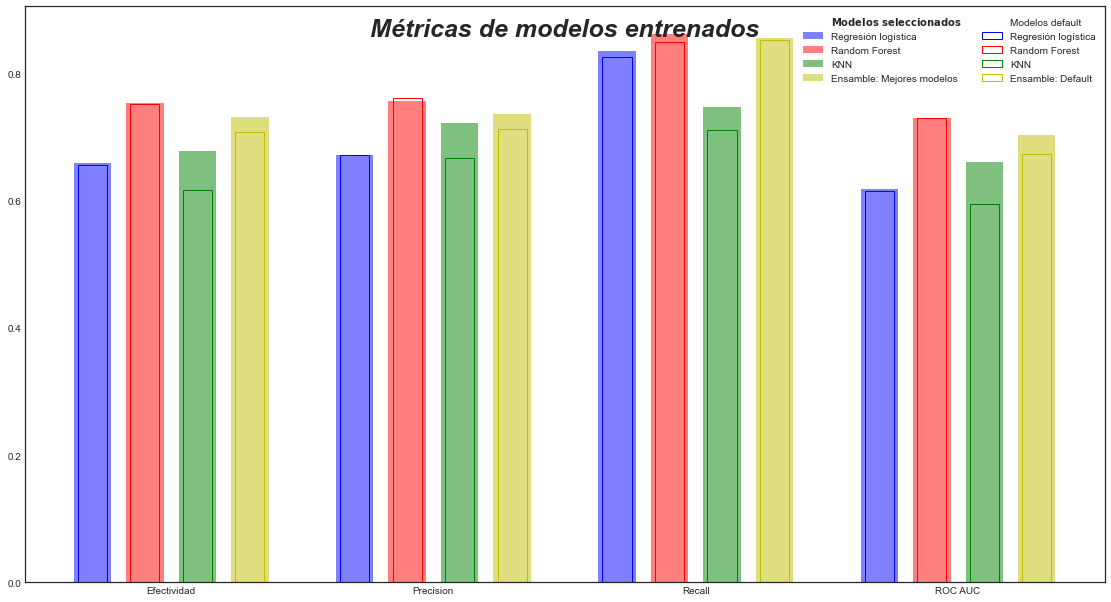

In [204]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

xticks = np.arange(4)

colors = ['b','r','g','y']

ax.plot([],[],' ',label="$\\bf{Modelos\ seleccionados}$")

for ind,i in enumerate(ModelMetrics.columns):
    ax.bar(xticks + ind/5, ModelMetrics[i], color = colors[ind], width = 1/7,alpha=0.5,label=i)
    
plt.plot([],[],' ',label='Modelos default')

for ind,i in enumerate(ModelMetricsDef.columns):
    ax.bar(xticks + ind/5, ModelMetricsDef[i],edgecolor =colors[ind], width = 1/9,label=i,fill=False)
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,3,4,5,1,6,7,8,9]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2) 

ax.set_xticks(xticks+0.3, ('Efectividad', 'Precision', 'Recall', 'ROC AUC'))

fig.suptitle('Métricas de modelos entrenados', size=25,fontstyle='italic',fontweight='bold')

In [205]:
iterables=[['Modelos seleccionados','Modelos default'],ModelMetrics.columns]

In [206]:
Metrics = pd.concat([ModelMetrics,ModelMetricsDef],axis=1)

In [207]:
Metrics.columns=pd.MultiIndex.from_product(iterables, names=["", ""])

In [208]:
Metrics

Modelos seleccionados                          \
                  Regresión logística Random Forest       KNN   
Efectividad                  0.660040      0.754120  0.678300   
Precision                    0.672770      0.757810  0.722130   
Recall                       0.835890      0.863070  0.747650   
ROC AUC - Score              0.618417      0.730042  0.661881   

                                              Modelos default                \
                Ensamble: Mejores modelos Regresión logística Random Forest   
Efectividad                      0.732480            0.656650      0.753090   
Precision                        0.736880            0.672230      0.762460   
Recall                           0.856900            0.826740      0.850470   
ROC AUC - Score                  0.703029            0.616394      0.730042   

                                                    
                     KNN Ensamble: Mejores modelos  
Efectividad      0.61690                  0.708630  
Precision        0.66760                  0.713580  
Recall           0.71083                  0.853440  
ROC AUC - Score  0.59467                  0.674351

## Modelos ocupando Doc2Vec

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

> Como se había comentado, para la parte de Doc2Vec, nuestra variable independiente no debía someterse a un proceso de limpieza tan agresivo, por lo cual, para la parte de modelo debemos de cambiar esta variable para obtener mejores métricas.

In [ ]:
# y = np.array(['topic'])
y = np.array(movies['Rating'])
y= np.where(y=='Bueno',1,0)

X = movies['review_semiclean']

In [ ]:
# Separamos nuestros datos de entrenamiento y validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [ ]:
db = pd.DataFrame(np.array([X_train,y_train]).transpose(),columns=['X','y'])

### Elección del número de features

> Al igual que para los modelos ocupando TF-IDF, para Doc2Vec el número de parámetros debe ser optimizado.  

> La idea es la misma que para TF-IDF, se generará un grid de número de features y elegiremos con base en las métricas de modelos default ocupando dichos valores de la grid.

In [ ]:
def dv2_train_test(X_train,X_test,taggeds,n_features,epochs):
    print('Entrenando modelo d2v')
    d2v = Doc2Vec(vector_size=n_features, min_count=1, epochs=epochs)
    d2v.build_vocab(taggeds)
    d2v.train(taggeds, total_examples=d2v.corpus_count, epochs=d2v.epochs)
    
    print('Creando matriz de entrenamiento')
    auxlist=list()

    for t in taggeds:
        v = d2v.infer_vector(t[0])
        auxlist.append(v)
    
    X_train_d2v=pd.DataFrame(auxlist)

    print('Creando matriz de validacion')
    
    auxlist=list()

    for t in X_test:
        v = d2v.infer_vector(t.split())
        auxlist.append(v)
        
    X_test_d2v=pd.DataFrame(auxlist)
    
    return X_train_d2v,X_test_d2v

In [ ]:
def try_d2v(model,X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    
    return model.score(X_test,y_test)

In [ ]:
train_tagged = db.apply(lambda r: TaggedDocument(words=r['X'].split(), tags=[r['y']]), axis=1)

In [ ]:
nfeat=[25,50,100,250,500,1000,2000,3000,4000]

In [ ]:
X_trainsets_d2v=list()
X_testsets_d2v=list()
for n in nfeat:
    trainaux, testaux =dv2_train_test(X_train,X_test,train_tagged,n,10)
    X_trainsets_d2v.append(trainaux)
    X_testsets_d2v.append(testaux)
    print('------------------')
    print('\n')

In [ ]:
save_object(X_trainsets_d2v,'d2v_trainsets')
save_object(X_testsets_d2v,'d2v_testsets')

#### Regresión logística

In [ ]:
LogitModel = LogisticRegression(random_state=12345, n_jobs=-1)

logitscores=list()

for ind, i in enumerate(X_trainsets_d2v):
    print('--------------------')
    score=try_d2v(LogitModel,X_trainsets_d2v[ind],X_testsets_d2v[ind],y_train,y_test)
    logitscores.append(score)
    print(f'Score con {nfeat[ind]} features: {score}')
    print('--------------------')
    
    print('\n')

#### Random Forest

In [ ]:
RF = RandomForestClassifier(random_state=12345, n_jobs=-1)

rfscores=list()

for ind, i in enumerate(X_trainsets_d2v):
    print('--------------------')
    score=try_d2v(RF,X_trainsets_d2v[ind],X_testsets_d2v[ind],y_train,y_test)
    rfscores.append(score)
    print(f'Score con {nfeat[ind]} features: {score}')
    print('--------------------')
    
    print('\n')

#### KNN

In [ ]:
KNN = KNeighborsClassifier(n_jobs=-1)

knnscores=list()

for ind, i in enumerate(X_trainsets_d2v):
    print('--------------------')
    score=try_d2v(KNN,X_trainsets_d2v[ind],X_testsets_d2v[ind],y_train,y_test)
    knnscores.append(score)
    print(f'Score con {nfeat[ind]} features: {score}')
    print('--------------------')
    
    print('\n')

#### Elección final del número de features

In [ ]:
ntunning=pd.DataFrame(logitscores,index=nfeat,columns=['Regresión Logistica'])
ntunning['Random Forest']=rfscores
ntunning['KNN']=knnscores

In [ ]:
ntunning

In [ ]:
ntunning.plot(logx=True,figsize=(20,8))

for ind,i in enumerate(nfeat):
    plt.text(i,logitscores[ind]-0.0035,i)
    
plt.xticks([])
plt.title('Score de modelos default con diferente número de features',size=20,fontweight='bold')

> Vemos que para el caso de la regresió logística, a mayor número de features, su score va incrementando, sin embargo, para los otros modelos es casi lo contrario.

>> Por lo tanto, en virtud de dar un buen performance general a los tres modelos, **se optará por elegir 50 como número de features para los modelos con Doc2Vec**

In [ ]:
train_tagged = db.apply(lambda r: TaggedDocument(words=r['X'].split(), tags=[r['y']]), axis=1)

In [ ]:
print('Entrenando modelo d2v')

d2v = Doc2Vec(vector_size=50, min_count=1, epochs=10)
d2v.build_vocab(train_tagged)
d2v.train(train_tagged, total_examples=d2v.corpus_count, epochs=d2v.epochs)

print('Creando matriz de entrenamiento')

auxlist=list()

for t in train_tagged:
    v = d2v.infer_vector(t[0])
    auxlist.append(v)
    
X_train_d2v=pd.DataFrame(auxlist)

print('Creando matriz de validacion')
    
auxlist=list()

for t in X_test:
    v = d2v.infer_vector(t.split())
    auxlist.append(v)
        
X_test_d2v=pd.DataFrame(auxlist)

### Regresión logística

#### Modelo default

In [ ]:
LogModel = LogisticRegression(random_state=12345, n_jobs=-1)

In [ ]:
LogModel.fit(X_train_d2v,y_train)

In [ ]:
y_LogModel=LogModel.predict(X_test_d2v)

In [ ]:
acc_LogModel, prec_LogModel, rec_LogModel, roc_LogModel = model_cf('Regresión\nlogística\n(Default)',y_test,y_LogModel)

In [ ]:
grafica_curva_roc(y_test,y_LogModel)

#### Tunning de parámetro C

In [ ]:
clist = np.logspace(-2,4,20,base=2)

LogitTemp=LogisticRegression(random_state=12345, n_jobs=-1)

train_scores, test_scores = validation_curve(
    LogitTemp,
    X_train_d2v,
    y_train,
    param_name='C',
    param_range=clist,
    cv=3,
    n_jobs=-1,
    scoring="accuracy")
    

In [ ]:
cscores=list(map(np.mean,test_scores))
ctunning = pd.DataFrame(cscores,index=clist,columns=['Score en test'])

In [ ]:
cbest=clist[np.argmax(cscores)]

In [ ]:
ctunning.plot(logx=True,figsize=(20,8))
plt.axvline(x=cbest,label='Valor óptimo',linestyle=':',color='green')
plt.plot([], [],' ',label=f'$C={round(cbest,4)}$')

plt.legend(fontsize = 'large')

for ind,i in enumerate(clist):
    plt.text(i,cscores[ind]-0.15*np.std(cscores),round(i,3))
    
plt.xticks([])
plt.title('Efectividad media de una regresión logística con parámetro C',size=20,fontweight='bold')

#### Mejor regresión logística

In [ ]:
BestLogModel = LogisticRegression(C=cbest,random_state=12345, n_jobs=-1)

In [ ]:
BestLogModel.fit(X_train_d2v,y_train)

In [ ]:
y_BestLogModel = BestLogModel.predict(X_test_d2v)

In [ ]:
acc_BestLogModel, prec_BestLogModel, rec_BestLogModel, roc_BestLogModel = model_cf('\nRegresión\nlogística\n\n(C=8.2972)',y_test,y_BestLogModel)

In [ ]:
grafica_curva_roc(y_test,y_BestLogModel)

### Random Forest

#### Modelo default

In [ ]:
RFModel = RandomForestClassifier(random_state=12345, n_jobs=-1)

In [ ]:
RFModel.fit(X_train_d2v,y_train)

In [ ]:
y_RFModel = RFModel.predict(X_test_d2v)

In [ ]:
acc_RFModel, prec_RFmodel, rec_RFModel, roc_RFModel = model_cf('Random Forest\n(Default)',y_test,y_RFModel)

In [ ]:
grafica_curva_roc(y_test,y_RFModel)

#### Tunning de parámetros

In [ ]:
param_grid={'criterion' : ['gini','entropy'],
            'min_samples_split' : [2,4,6,10],
            'min_samples_leaf' : [1,2,3],
           }

In [ ]:
RF = RandomForestClassifier(random_state=12345, n_jobs=-1)

In [ ]:
search_RF = HalvingGridSearchCV(RF, resource='n_estimators', max_resources=200,cv=3, param_grid=param_grid,factor = 2,random_state=12345,verbose=np.inf,scoring="accuracy").fit(X_train_d2v, y_train)

In [ ]:
rftunning=pd.DataFrame(search_RF.cv_results_)

In [ ]:
indrfmax=np.argmax(rftunning['mean_test_score'])
rfbest=rftunning.iloc[indrfmax,:]

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
    
ax1 = plt.subplot2grid((1, 10), (0, 0),colspan=7)
ax2 = plt.subplot2grid((1, 10), (0, 7),colspan=4)

rftunning.plot(use_index=True, y='mean_test_score',figsize=(20,8),ax=ax1)

for ind,i in enumerate(rftunning.index):
    ax1.text(ind,rftunning['mean_test_score'][ind],str(ind),ha='center')

ax1.set_xticks([])
ax1.axvline(x=indrfmax,label='Modelo óptimo',linestyle=':',color='green')
ax1.plot([],[],' ',label=f"Score: {round(rftunning['mean_test_score'][indrfmax],4)}")
ax1.legend()

auxrf=rftunning[[x for x in rftunning if 'param_' in x]]

bbox=[0.25,0,1,1]

table = ax2.table(cellText = auxrf.values, rowLabels = ['Modelo: ' + str(x) for x in auxrf.index],bbox=bbox,colLabels=[x.replace('param_','') for x in auxrf.columns])
ax2.axis('off')

plt.suptitle('Efectividad media usando diversos parámetros en un modelo Random Forest\n(3K Fold CV)',size=20,fontweight='bold')

#### Mejor modelo Random Forest

> Nuestro mejor modelo Random Forest tiene los siguientes parámetros

In [ ]:
auxrf.iloc[indrfmax,:]

In [ ]:
BestRFModel = RandomForestClassifier(criterion='entropy',min_samples_leaf=3,min_samples_split=10,n_estimators=192,random_state=12345, n_jobs=-1)

In [ ]:
BestRFModel.fit(X_train_d2v,y_train)

In [ ]:
y_BestRFModel = BestRFModel.predict(X_test_d2v)

In [ ]:
acc_BestRFModel, prec_BestRFModel, rec_BestRFModel, roc_BestRFModel = model_cf('\nRandom Forest\n (Mejor modelo)',y_test,y_BestRFModel)

In [ ]:
grafica_curva_roc(y_test,y_BestRFModel)

### KNN

#### Modelo default

In [ ]:
KNNModel = KNeighborsClassifier(n_jobs=-1)

In [ ]:
KNNModel.fit(X_train_d2v,y_train)

In [ ]:
y_KNNModel = KNNModel.predict(X_test_d2v)

In [ ]:
acc_KNNModel, prec_KNNModel, rec_KNNModel, roc_KNNModel = model_cf('K Nearest Neighbors\n(Default K=5)',y_test,y_KNNModel)

In [ ]:
grafica_curva_roc(y_test,y_KNNModel)

#### Tunning de parámetros

In [ ]:
param_grid={'n_neighbors':[5,10,100],
            'weights' : ['uniform', 'distance'],
            'leaf_size':[10,30,50,100],
            'p':[1,2]
           }

In [ ]:
KNN = KNeighborsClassifier(n_jobs=-1)

In [ ]:
search_KNN = HalvingGridSearchCV(KNN, cv=3, param_grid=param_grid,factor = 2,random_state=12345,verbose=np.inf,scoring="accuracy").fit(X_train_d2v, y_train)

In [ ]:
knntunning=pd.DataFrame(search_KNN.cv_results_)

In [ ]:
indknnmax=np.argmax(knntunning['mean_test_score'])
knnbest=knntunning.iloc[indknnmax,:]

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
    
ax1 = plt.subplot2grid((1, 10), (0, 0),colspan=7)
ax2 = plt.subplot2grid((1, 10), (0, 7),colspan=4)

knntunning.plot(use_index=True, y='mean_test_score',figsize=(20,8),ax=ax1)

for ind,i in enumerate(knntunning.index):
    ax1.text(ind,knntunning['mean_test_score'][ind],str(ind),ha='center')

ax1.set_xticks([])
ax1.axvline(x=indknnmax,label='Modelo óptimo',linestyle=':',color='green')
ax1.plot([],[],' ',label=f"Score: {round(knntunning['mean_test_score'][indknnmax],4)}")
ax1.legend()

auxknn=knntunning[[x for x in knntunning if 'param_' in x]]

bbox=[0.25,0,1,1]

table = ax2.table(cellText = auxknn.values, rowLabels = ['Modelo: ' + str(x) for x in auxknn.index],bbox=bbox,colLabels=[x.replace('param_','') for x in auxknn.columns])
ax2.axis('off')

plt.suptitle('Efectividad media usando diversos parámetros en un modelo KNN\n(3K Fold CV)',size=20,fontweight='bold')

#### Mejor modelo KNN

> Los mejores parámetros para un modelo KNN son:

In [ ]:
auxknn.iloc[indknnmax,:]

In [ ]:
BestKNNModel = KNeighborsClassifier(n_neighbors=10,leaf_size=30,p=2,weights='distance',n_jobs=-1)

In [ ]:
BestKNNModel.fit(X_train_d2v,y_train)

In [ ]:
y_BestKNNModel = BestKNNModel.predict(X_test_d2v)

In [ ]:
acc_BestKNNModel, prec_BestKNNModel, rec_BestKNNModel, roc_BestKNNModel = model_cf('\nKNN\n (Mejor modelo)',y_test,y_BestKNNModel)

In [ ]:
grafica_curva_roc(y_test,y_BestKNNModel)

### Ensambles

#### Ensambles de modelos default

In [ ]:
y_preds_def= pd.DataFrame(y_LogModel, columns=['Regresión logística'])
y_preds_def['Random Forest']=y_RFModel
y_preds_def['KNN']=y_KNNModel
y_preds_def['Emsable modelos default']=y_preds_def.mode(axis=1)
y_ensdefault=y_preds_def['Emsable modelos default']
y_preds_def.head(10)

In [ ]:
acc_ensdefault, prec_ensdefault, rec_ensdefault, roc_ensdefault = model_cf('Emsable:\n modelos default',y_test,y_ensdefault)

#### Ensamble de modelos seleccionados

In [ ]:
y_preds_best= pd.DataFrame(y_BestLogModel, columns=['Regresión logística'])
y_preds_best['Random Forest']=y_BestRFModel
y_preds_best['KNN']=y_BestKNNModel
y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
y_ensbest=y_preds_best['Emsable mejores modelos']
y_preds_best.head(10)

In [ ]:
acc_ensbest, prec_ensbest, rec_ensbest, roc_ensbest = model_cf('Emsable:\n mejores modelos',y_test,y_ensbest)

### Comparación de modelos

#### Métricas de modelos default

In [ ]:
ModelMetricsDef= pd.DataFrame([acc_LogModel,prec_LogModel,rec_LogModel,roc_LogModel],index=['Efectividad','Precision','Recall','ROC AUC - Score'],columns=['Regresión logística'])
ModelMetricsDef['Random Forest']=[acc_RFModel,prec_RFmodel,rec_RFModel,roc_RFModel]
ModelMetricsDef['KNN']=[acc_KNNModel,prec_KNNModel,rec_KNNModel,roc_KNNModel]
ModelMetricsDef['Ensamble: Default']=[acc_ensdefault,prec_ensdefault,rec_ensdefault,roc_ensdefault]

In [ ]:
ModelMetricsDef

In [ ]:
ModelMetricsDef_d2v = ModelMetricsDef
save_object(ModelMetricsDef_d2v,'ModelMetricsDef_d2v')

#### Métricas de modelos seleccionados

In [ ]:
ModelMetrics= pd.DataFrame([acc_BestLogModel,prec_BestLogModel,rec_BestLogModel,roc_BestLogModel],index=['Efectividad','Precision','Recall','ROC AUC - Score'],columns=['Regresión logística'])
ModelMetrics['Random Forest']=[acc_BestRFModel,prec_BestRFModel,rec_BestRFModel,roc_RFModel]
ModelMetrics['KNN']=[acc_BestKNNModel,prec_BestKNNModel,rec_BestKNNModel,roc_BestKNNModel]
ModelMetrics['Ensamble: Mejores modelos']=[acc_ensbest,prec_ensbest,rec_ensbest,roc_ensbest]

In [ ]:
ModelMetrics

In [ ]:
ModelMetrics_d2v = ModelMetrics
save_object(ModelMetrics_d2v,'ModelMetrics_d2v')

### Resumen

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

xticks = np.arange(4)

colors = ['b','r','g','y']

ax.plot([],[],' ',label="$\\bf{Modelos\ seleccionados}$")

for ind,i in enumerate(ModelMetrics.columns):
    ax.bar(xticks + ind/5, ModelMetrics[i], color = colors[ind], width = 1/7,alpha=0.5,label=i)
    
plt.plot([],[],' ',label='Modelos default')

for ind,i in enumerate(ModelMetricsDef.columns):
    ax.bar(xticks + ind/5, ModelMetricsDef[i],edgecolor =colors[ind], width = 1/9,label=i,fill=False)
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,3,4,5,1,6,7,8,9]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2) 

ax.set_xticks(xticks+0.3, ('Efectividad', 'Precision', 'Recall', 'ROC AUC'))

fig.suptitle('Métricas de modelos entrenados', size=25,fontstyle='italic',fontweight='bold')

In [ ]:
iterables=[['Modelos seleccionados','Modelos default'],ModelMetrics.columns]

In [ ]:
Metrics = pd.concat([ModelMetrics,ModelMetricsDef],axis=1)

In [ ]:
Metrics.columns=pd.MultiIndex.from_product(iterables, names=["", ""])

In [ ]:
Metrics

> De igual manera, **el mejor modelo entrenando con Doc2Vec resultó ser la regresión logística.**  De entre todos los candidatos, preservo la igualdad en las métricas.
>
> Lo realmente destacable de este método de word embedding es que **obtuvo métricas bastante similares al TF-IDF sin ocupar tanto tiempo en realizar la computación**, por lo cual, este método tiene una ventaja enorme contra TF-IDF. Además de que no fue necesario realizar tanto análisis para lograr incrementar nuestras métricas

## TF-IDF vs Doc2Vec

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

xticks = np.arange(4)

colors = ['b','r','g','y']

ax.plot([],[],' ',label="Modelos entrenados con TF-IDF")

for ind,i in enumerate(ModelMetricsDef_TFID.columns):
    ax.bar(xticks + ind/5, ModelMetricsDef_TFID[i], color = colors[ind], width = 1/7,alpha=0.5,label=i)
    
plt.plot([],[],' ',label='Modelos entrenados con Doc2Vec')

for ind,i in enumerate(ModelMetricsDef_d2v.columns):
    ax.bar(xticks + ind/5, ModelMetricsDef_d2v[i],edgecolor =colors[ind], width = 1/9,label=i,fill=False)
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,3,4,5,1,6,7,8,9]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2) 

ax.set_xticks(xticks+0.3, ('Efectividad', 'Precision', 'Recall', 'ROC AUC'))

fig.suptitle('TF-IDF vs Doc2Vec\n (Modelos default)', y=1.115,size=25,fontstyle='italic',fontweight='bold')

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

xticks = np.arange(4)

colors = ['b','r','g','y']

ax.plot([],[],' ',label="Modelos entrenados con TF-IDF")

for ind,i in enumerate(ModelMetrics_TFID.columns):
    ax.bar(xticks + ind/5, ModelMetrics_TFID[i], color = colors[ind], width = 1/7,alpha=0.5,label=i)
    
plt.plot([],[],' ',label='Modelos entrenados con Doc2Vec')

for ind,i in enumerate(ModelMetrics_d2v.columns):
    ax.bar(xticks + ind/5, ModelMetrics_d2v[i],edgecolor =colors[ind], width = 1/9,label=i,fill=False)
    
    
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,2,3,4,5,1,6,7,8,9]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2) 

ax.set_xticks(xticks+0.3, ('Efectividad', 'Precision', 'Recall', 'ROC AUC'))

fig.suptitle('TF-IDF vs Doc2Vec\n (Mejores modelos)', y=1.115,size=25,fontstyle='italic',fontweight='bold')

> Salvo bootstrap diga lo contrario, podemos afirmar que **nuestro mejor modelo**, independientemente del tipo de word embedding empleado, **es la regresión logística regularizada.**  
>
> Y referente a lo anterior, podemos realizar un par de observaciones:
>
> * Cuando se empezo a trabajar los modelos con TF-IDF, eran realmente malos sin considerar el análisis de varianza expuesto, por lo cual, Doc2Vec logró métricas excepcionales sin incurrir a tanto análisis.
> * **La ventaja principal respecto a estos dos métodos es el tiempo de computación.** Claramente es notorio, mientras que para lograr unas métricas similares **con TF-IDF nos tómo casi 70 minutos, con Doc2Vec nos tomó 10 aproximadamente.**
> * En general, podríamos decir que si se emplea un método de word embedding mas sofisticado es mas sencillo entrenar un modelo de clasificación de texto y obtener mejores métricas


# Elección de modelo y bootstrap

## TF-IDF

> Como se menciono anteriormente en el análisis de varianza, el proceso para la reducción de dimensión fue efectivo pero tarda demasiado en ejecutarse (60 minutos aproximadamente), por lo cual, si queremos llevar a la aplicación este método a un proceso bootstrap, simple y sencillamente no terminaríamos, únicamente de reducir dimensiones esperariamos 60 minutos en cada iteración. Si hicieramos 1000 iteraciones, el proceso **tardaría 41 días siendo bastante optimistas**.


> En consencuencia de lo anterior, se intentó realizar este proceso en reiteradas ocasiones intentando si quiera el mínimo de iteraciones (10), sin embargo, el método jamas terminaba (se moría el kernel, se acaba la memoria, la maquina se congelaba). **Por lo cual, realizar bootstrap con un modelo de reducción de dimensión tan ambicioso no es viable.**
>
> La implementación de bootstrap es la siguiente aunque no se haya concluido.

In [ ]:
BestLogModel = LogisticRegression(C=8.297240355569535,random_state=12345, n_jobs=-1)
BestRFModel = RandomForestClassifier(criterion='entropy',min_samples_leaf=3,min_samples_split=10,n_estimators=192,random_state=12345, n_jobs=-1)
BestKNNModel = KNeighborsClassifier(n_neighbors=10,leaf_size=30,p=2,weights='distance',n_jobs=-1)

### Bootstrap

In [ ]:
t0 = time.time()

num_records = y.shape[0]
bootstrap_errors_logit = []
bootstrap_errors_rf = []
bootstrap_errors_knn = []
bootstrap_errors_ens = []

np.random.seed(0)

for i in range(250):
    train_indices = np.random.choice(range(num_records), num_records, replace=True)
    test_indices = np.setdiff1d(range(num_records), train_indices)
    
    X_train_b, y_train_b = np.array(X)[train_indices], y[train_indices]
    X_test_b, y_test_b = np.array(X)[test_indices], y[test_indices]
    
    db = pd.DataFrame(np.array([X_train_b,y_train_b]).transpose(),columns=['X','y'])
    
    train_tagged = db.apply(lambda r: TaggedDocument(words=r['X'].split(), tags=[r['y']]), axis=1)
    
    d2v = Doc2Vec(vector_size=50, min_count=1, epochs=10)
    d2v.build_vocab(train_tagged)
    d2v.train(train_tagged, total_examples=d2v.corpus_count, epochs=d2v.epochs)

    auxlist=list()

    for t in train_tagged:
        v = d2v.infer_vector(t[0])
        auxlist.append(v)
    
    X_train_b=pd.DataFrame(auxlist)
    
    auxlist=list()

    for t in X_test_b:
        v = d2v.infer_vector(t.split())
        auxlist.append(v)
        
    X_test_b=pd.DataFrame(auxlist)

    
    # Logit model L2
    BestLogModel.fit(X_train_b, y_train_b)
    y_Log=BestLogModel.predict(X_test_b)
    bootstrap_errors_logit.append(roc_auc_score(y_test_b, y_Log))
    
    # RF model
    BestRFModel.fit(X_train_b, y_train_b)
    y_RF=BestRFModel.predict(X_test_b)
    bootstrap_errors_rf.append(roc_auc_score(y_test_b, y_RF))
    
    # KNN
    BestKNNModel.fit(X_train_b, y_train_b)
    y_KNN = BestKNNModel.predict(X_test_b)
    bootstrap_errors_knn.append(roc_auc_score(y_test_b, y_KNN))
    
    # Ensamble
    y_preds_best= pd.DataFrame(y_Log, columns=['Regresión logística'])
    y_preds_best['Random Forest']=y_RF
    y_preds_best['KNN']=y_KNN
    y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
    y_ens = y_preds_best['Emsable mejores modelos']
    bootstrap_errors_ens.append(roc_auc_score(y_test_b, y_ens))
    
    print(i)

t1 = time.time()

In [ ]:
print(f'El tiempo de ejecución del proceso bootstrap con 10 iteraciones fue de: {t1-t0} segundos')

## Doc2Vec

> Como se ha mencionado, Doc2Vec nos brindo resultados excepcionales sin ocupar tanto tiempo de computo.  
> Para este método, si fue posible realizar el proceso bootstrap (250 iteraciones) que tomó aproximadamente 16 horas.
>
> Los resultados se exponen a continuación

In [ ]:
BestLogModel = LogisticRegression(C=8.297240355569535,random_state=12345, n_jobs=-1)
BestRFModel = RandomForestClassifier(criterion='entropy',min_samples_leaf=3,min_samples_split=10,n_estimators=192,random_state=12345, n_jobs=-1)
BestKNNModel = KNeighborsClassifier(n_neighbors=10,leaf_size=30,p=2,weights='distance',n_jobs=-1)

### Bootstrap

In [ ]:
t0 = time.time()

num_records = y.shape[0]
bootstrap_errors_logit = []
bootstrap_errors_rf = []
bootstrap_errors_knn = []
bootstrap_errors_ens = []

np.random.seed(0)

for i in range(250):
    train_indices = np.random.choice(range(num_records), num_records, replace=True)
    test_indices = np.setdiff1d(range(num_records), train_indices)
    
    X_train_b, y_train_b = np.array(X)[train_indices], y[train_indices]
    X_test_b, y_test_b = np.array(X)[test_indices], y[test_indices]
    
    db = pd.DataFrame(np.array([X_train_b,y_train_b]).transpose(),columns=['X','y'])
    
    train_tagged = db.apply(lambda r: TaggedDocument(words=r['X'].split(), tags=[r['y']]), axis=1)
    
    d2v = Doc2Vec(vector_size=50, min_count=1, epochs=10)
    d2v.build_vocab(train_tagged)
    d2v.train(train_tagged, total_examples=d2v.corpus_count, epochs=d2v.epochs)

    auxlist=list()

    for t in train_tagged:
        v = d2v.infer_vector(t[0])
        auxlist.append(v)
    
    X_train_b=pd.DataFrame(auxlist)
    
    auxlist=list()

    for t in X_test_b:
        v = d2v.infer_vector(t.split())
        auxlist.append(v)
        
    X_test_b=pd.DataFrame(auxlist)

    
    # Logit model L2
    BestLogModel.fit(X_train_b, y_train_b)
    y_Log=BestLogModel.predict(X_test_b)
    bootstrap_errors_logit.append(roc_auc_score(y_test_b, y_Log))
    
    # RF model
    BestRFModel.fit(X_train_b, y_train_b)
    y_RF=BestRFModel.predict(X_test_b)
    bootstrap_errors_rf.append(roc_auc_score(y_test_b, y_RF))
    
    # KNN
    BestKNNModel.fit(X_train_b, y_train_b)
    y_KNN = BestKNNModel.predict(X_test_b)
    bootstrap_errors_knn.append(roc_auc_score(y_test_b, y_KNN))
    
    # Ensamble
    y_preds_best= pd.DataFrame(y_Log, columns=['Regresión logística'])
    y_preds_best['Random Forest']=y_RF
    y_preds_best['KNN']=y_KNN
    y_preds_best['Emsable mejores modelos']=y_preds_best.mode(axis=1)
    y_ens = y_preds_best['Emsable mejores modelos']
    bootstrap_errors_ens.append(roc_auc_score(y_test_b, y_ens))
    
    print(i)

t1 = time.time()

### Estadísticas bootstrap

In [ ]:
bootstrapdb=pd.DataFrame(np.array([bootstrap_errors_logit,bootstrap_errors_rf,bootstrap_errors_knn,bootstrap_errors_ens]).transpose(),columns=['Regresión logistica','Random Forest','KNN','Ensamble: Mejores modelos'])

In [ ]:
bootstrapdb=load_object('BTMetricsD2V.pkl')

In [ ]:
bootstrap_metrics=bootstrapdb.describe(percentiles=[0.025,0.975])
bootstrap_metrics

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=bootstrapdb,palette='pastel',whis=(0.025,0.975),orient = 'h',fliersize=2,linewidth=2.5)
plt.xlabel('ROC AUC')
plt.title('Distribución de valores ROC AUC de nuestros modelos\n (Usando bootstrap)',size=20,fontweight='bold')

In [ ]:
plt.figure(figsize=(15,8))
g = sns.barplot(x=bootstrap_metrics.T.index,y=bootstrap_metrics.T['mean'],palette="Blues_d")
g.bar_label(g.containers[0])
plt.title('Valor medio de los valores ROC AUC de nuestros modelos\n(usando bootstrap)',size=20,fontweight='bold')

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,7))

sns.histplot(bootstrapdb,x='Regresión logistica',ax=ax[0],element="step",alpha=0.5,color='red')
sns.histplot(bootstrapdb,x='Random Forest',ax=ax[1],element="step",alpha=0.5,color='blue')
sns.histplot(bootstrapdb,x='KNN',ax=ax[2],element="step",alpha=0.5,color='green')
sns.histplot(bootstrapdb,x='Ensamble: Mejores modelos',ax=ax[3],element="step",alpha=0.5,color='yellow')

fig.suptitle('Distribución de valores ROC AUC de nuestros modelos\n (Usando bootstrap)',size=20,fontweight='bold')

## **Elección final**

> Finalmente, tras todos los modelos entrenados y con base en el bootstrap, podemos decir que **el mejor modelo para atacar nuestro problema es la regresión logística regularizada**, brinda mejores métricas y mas estables.  
>
> Además, se puede tener dos variantes, entrenada con TF-IDF o Doc2Vec pero como se ha expuesto y recalcado, el método Doc2Vec es mucho mas eficaz y mas rápido.

>> **Elección final: Regresión logística regularizada entrenada con word embedding Doc2Vec**

# Redes Neuronales

> A manera de comparativa, se va a entrenar una red neuronal que pretende competir con el modelo anterior seleccionado.

> La principal motivación sobre como está conformada la red es con base en el siguiente artículo:  
>

<center><i><b> "Deep Learning Techniques for Text Classification" [1] </b></i></center>
<center><i> - Diardano Raihan </i>

> Por lo cual, se agracede a Diardano la inspiración y por el uso de algunas funciones útiles que desarrolló.

> El tipo de red que se ocupará es la red convolucional temporal (TCN), que grosso modo es una combinación de una red neuronal convolucional (CNN) y una red neuronal recurrente (RNN).  
> Este tipo de redes han resultado ser bastante eficientes para atacar problemas que involucran la evolución o análisis de problemas mas complejos y mas humanos. 
>
> El proceso del entrenamiento de esta red es el siguiente:

## Paquetería necesaria y funciones de utilidad

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import concatenate, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model


In [ ]:
# Define a function to compute the max length of sequence
def max_length(sequences):
    '''
    input:
        sequences: a 2D list of integer sequences
    output:
        max_length: the max length of the sequences
    '''
    max_length = 0
    for i, seq in enumerate(sequences):
        length = len(seq)
        if max_length < length:
            max_length = length
    return max_length

> El input que vamos a ocupar para nuestra red será el de la variable que se ocupó para los modelos Doc2Vec, es decir, la que no tiene un proceso de limpieza tan rudo.

In [ ]:
# y = np.array(['topic'])
y = np.array(movies['Rating'])
y= np.where(y=='Bueno',1,0)

X = movies['review_semiclean']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

> A diferencia de los modelos anterior entrenados, para una red neuronal de clasificación de texto el método de embedding no debe ser tan complejo.  
>
> Se recomienda usar la tokenización y luego el método de padding (que grosso modo es un método que cuanta las veces que se repite cada palabra en el vocabulario, genera el vector de conteo y a ese vector le agrega tantos ceros como la cantidad de elementos le falten para llegar a la misma longitud del vector de la oración con mas palabras) para posterior hacer un embedding con keras.

In [ ]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
max_len = max_length(train_sequences)

X_train_pad = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(test_sequences, maxlen=max_len,  padding='post', truncating='post')

n = len(tokenizer.word_index)+1


### Estructuración de la red

In [ ]:
inp = Input( shape=(max_len,))

x = Embedding(input_dim=n, output_dim=300, input_length=max_len)(inp)
x = SpatialDropout1D(0.1)(x)

x = TCN(128,dilations = [1, 2, 4], return_sequences=True, activation = 'relu', name = 'tcn1')(x)
x = TCN(64,dilations = [1, 2, 4], return_sequences=True, activation = 'relu', name = 'tcn2')(x)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)

conc = concatenate([avg_pool, max_pool])
conc = Dense(16, activation="relu")(conc)
conc = Dropout(0.1)(conc)
outp = Dense(1, activation="sigmoid")(conc)    

model = Model(inputs=inp, outputs=outp)


In [ ]:
model.summary()

### Parámetros de optimización

In [ ]:
model.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Early call back

> Una manera bastante útil para evitar entrenar una red durante mucho tiempo sin que en realidad haya un avance en su entrenamiento, es el uso de early callbacks. Estos son mecanismos que hacen el tracking de alguna métrica durante el entrenamiento y si se cumplen ciertas condiciones, nosotros le diremos a la red qué queremos que haga.  

> La siguiente es un ejemplo de un early callback que especifica que **si la red no ha aprendido nada** (delta = 0) **pasadas 20 épocas** (patience = 20) -es decir, que el scores de validación no aumente- **haremos que la red pare el entrenamiento y restaure los pesos optimos de la última época que la red aprendió.**

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=20, verbose=2, 
                                             mode='auto', restore_best_weights=True)

### Entrenamiento

> Se entrenará la red con un total de 1000 épocas (salvo que termine antes por el early callback anterior) y un batch size de 50, que se refiere a cada cuantos registros en nuestra epoca va a modificar los pesos óptimos de la red

In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=50, epochs=100, verbose=1, callbacks=[callbacks], validation_data=(X_test_pad, y_test),workers=6,use_multiprocessing=True)